___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [8]:
df[["Exited", "IsActiveMember"]].value_counts()

Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
dtype: int64

In [9]:
# drop 'RowNumber', 'CustomerId', 'Surname' columns

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

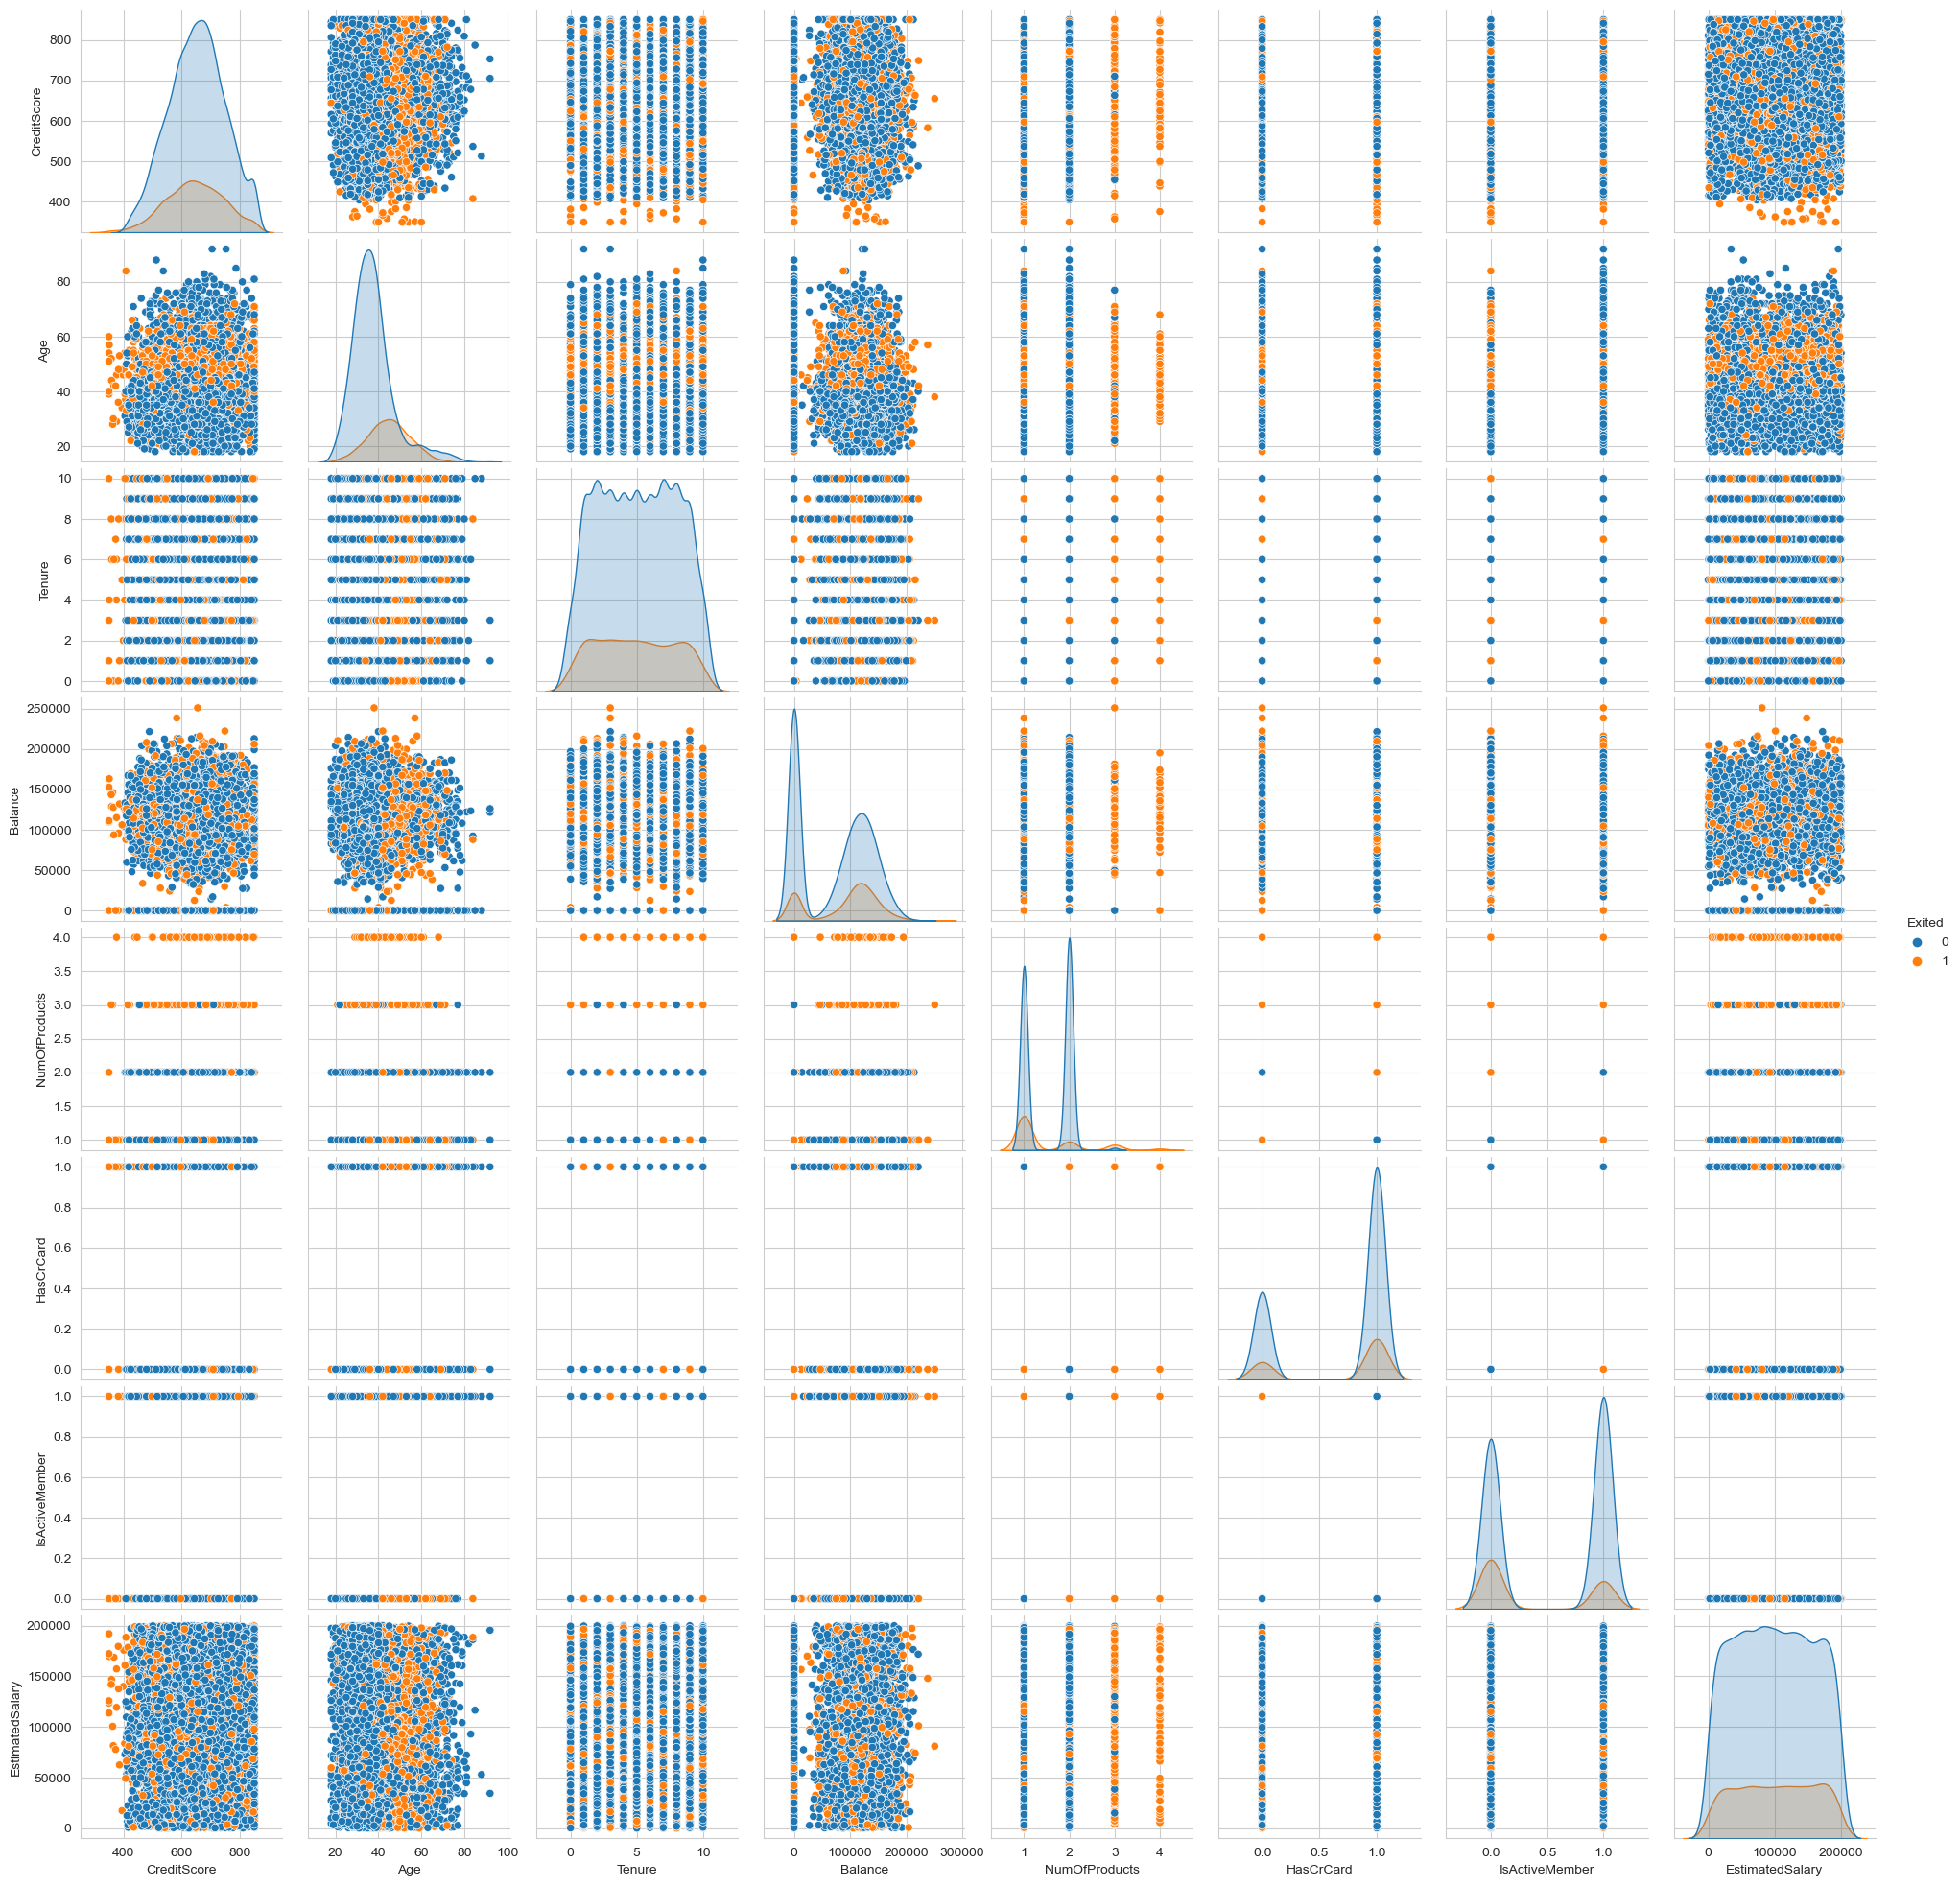

In [10]:
sns.pairplot(df, hue= "Exited")
plt.show()

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [12]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


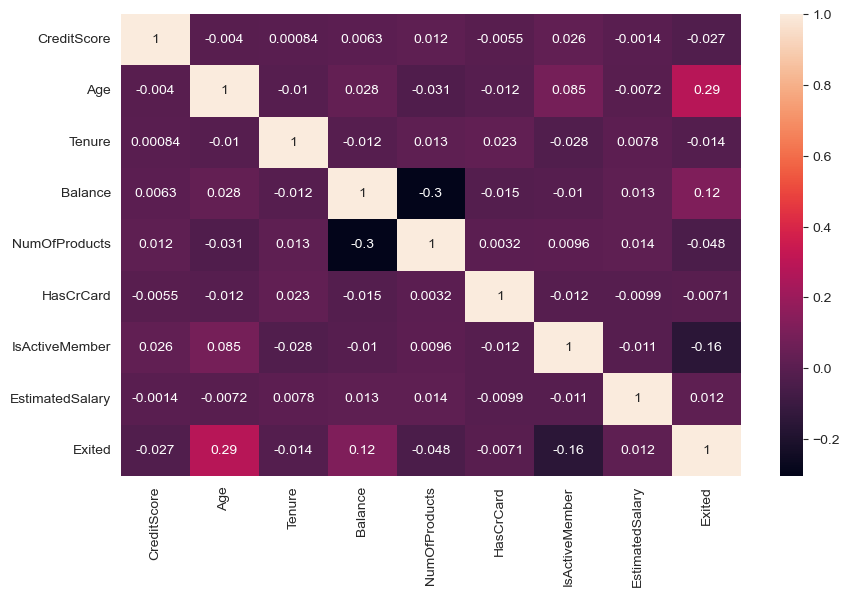

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

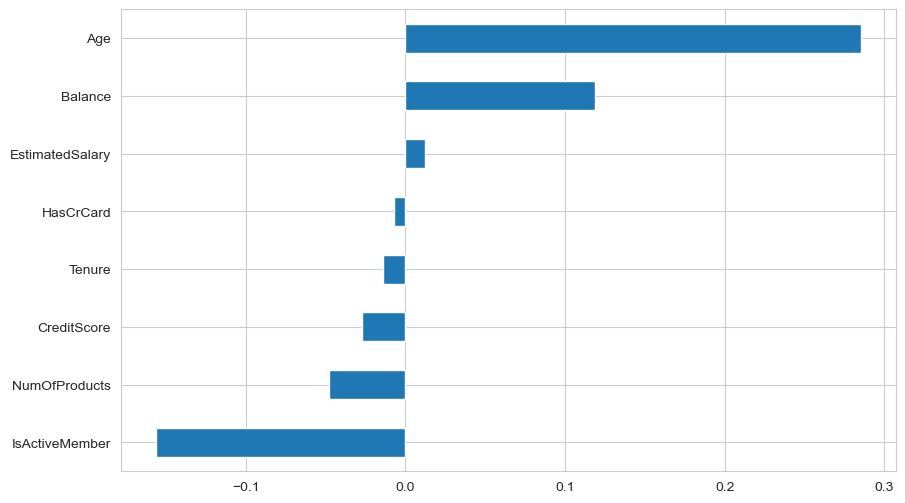

In [14]:
df.corr()["Exited"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.show()

In [15]:
df.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
seed = 42

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = seed)

In [20]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [21]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [22]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [24]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [25]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 1000, verbose=1)

Epoch 1/1000
50/50 [==============================] - 1s 4ms/step - loss: 0.5428 - accuracy: 0.7805 - val_loss: 0.5002 - val_accuracy: 0.7871
Epoch 2/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7973 - val_loss: 0.4841 - val_accuracy: 0.7871
Epoch 3/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7973 - val_loss: 0.4749 - val_accuracy: 0.7871
Epoch 4/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.7973 - val_loss: 0.4683 - val_accuracy: 0.7871
Epoch 5/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.7973 - val_loss: 0.4629 - val_accuracy: 0.7871
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7973 - val_loss: 0.4564 - val_accuracy: 0.7871
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7973 - val_loss: 0.4520 - val_accuracy: 0.7871
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8581 - val_loss: 0.3710 - val_accuracy: 0.8386
Epoch 59/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8563 - val_loss: 0.3740 - val_accuracy: 0.8414
Epoch 60/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8570 - val_loss: 0.3707 - val_accuracy: 0.8443
Epoch 61/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8573 - val_loss: 0.3753 - val_accuracy: 0.8443
Epoch 62/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8590 - val_loss: 0.3679 - val_accuracy: 0.8443
Epoch 63/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8583 - val_loss: 0.3688 - val_accuracy: 0.8471
Epoch 64/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8587 - val_loss: 0.3724 - val_accuracy: 0.8471
Epoch 65/1000

50/50 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8611 - val_loss: 0.3648 - val_accuracy: 0.8486
Epoch 116/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8592 - val_loss: 0.3632 - val_accuracy: 0.8486
Epoch 117/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8627 - val_loss: 0.3635 - val_accuracy: 0.8429
Epoch 118/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8617 - val_loss: 0.3619 - val_accuracy: 0.8457
Epoch 119/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8586 - val_loss: 0.3625 - val_accuracy: 0.8529
Epoch 120/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8606 - val_loss: 0.3661 - val_accuracy: 0.8443
Epoch 121/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8594 - val_loss: 0.3634 - val_accuracy: 0.8429
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8625 - val_loss: 0.3604 - val_accuracy: 0.8429
Epoch 173/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8630 - val_loss: 0.3627 - val_accuracy: 0.8400
Epoch 174/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8619 - val_loss: 0.3613 - val_accuracy: 0.8443
Epoch 175/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8646 - val_loss: 0.3644 - val_accuracy: 0.8443
Epoch 176/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8632 - val_loss: 0.3640 - val_accuracy: 0.8400
Epoch 177/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8614 - val_loss: 0.3619 - val_accuracy: 0.8443
Epoch 178/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8622 - val_loss: 0.3625 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8635 - val_loss: 0.3605 - val_accuracy: 0.8414
Epoch 230/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8624 - val_loss: 0.3589 - val_accuracy: 0.8414
Epoch 231/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8625 - val_loss: 0.3582 - val_accuracy: 0.8429
Epoch 232/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8637 - val_loss: 0.3572 - val_accuracy: 0.8457
Epoch 233/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8616 - val_loss: 0.3592 - val_accuracy: 0.8471
Epoch 234/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8624 - val_loss: 0.3624 - val_accuracy: 0.8414
Epoch 235/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8633 - val_loss: 0.3580 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8656 - val_loss: 0.3698 - val_accuracy: 0.8371
Epoch 287/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8637 - val_loss: 0.3596 - val_accuracy: 0.8371
Epoch 288/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8652 - val_loss: 0.3577 - val_accuracy: 0.8429
Epoch 289/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8638 - val_loss: 0.3589 - val_accuracy: 0.8471
Epoch 290/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8665 - val_loss: 0.3580 - val_accuracy: 0.8400
Epoch 291/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8640 - val_loss: 0.3564 - val_accuracy: 0.8443
Epoch 292/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8654 - val_loss: 0.3582 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8632 - val_loss: 0.3568 - val_accuracy: 0.8443
Epoch 344/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8651 - val_loss: 0.3548 - val_accuracy: 0.8429
Epoch 345/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8665 - val_loss: 0.3619 - val_accuracy: 0.8471
Epoch 346/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8654 - val_loss: 0.3606 - val_accuracy: 0.8429
Epoch 347/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8640 - val_loss: 0.3580 - val_accuracy: 0.8471
Epoch 348/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8668 - val_loss: 0.3640 - val_accuracy: 0.8514
Epoch 349/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8684 - val_loss: 0.3562 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8652 - val_loss: 0.3583 - val_accuracy: 0.8471
Epoch 401/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8667 - val_loss: 0.3560 - val_accuracy: 0.8529
Epoch 402/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8668 - val_loss: 0.3543 - val_accuracy: 0.8500
Epoch 403/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8665 - val_loss: 0.3583 - val_accuracy: 0.8529
Epoch 404/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8670 - val_loss: 0.3592 - val_accuracy: 0.8529
Epoch 405/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8676 - val_loss: 0.3559 - val_accuracy: 0.8486
Epoch 406/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8646 - val_loss: 0.3589 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3169 - accuracy: 0.8681 - val_loss: 0.3589 - val_accuracy: 0.8457
Epoch 458/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8665 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 459/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8683 - val_loss: 0.3587 - val_accuracy: 0.8486
Epoch 460/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8670 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 461/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8667 - val_loss: 0.3587 - val_accuracy: 0.8529
Epoch 462/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8690 - val_loss: 0.3613 - val_accuracy: 0.8514
Epoch 463/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8683 - val_loss: 0.3557 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8684 - val_loss: 0.3583 - val_accuracy: 0.8471
Epoch 515/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8686 - val_loss: 0.3636 - val_accuracy: 0.8457
Epoch 516/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8684 - val_loss: 0.3581 - val_accuracy: 0.8443
Epoch 517/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8683 - val_loss: 0.3582 - val_accuracy: 0.8514
Epoch 518/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8684 - val_loss: 0.3574 - val_accuracy: 0.8486
Epoch 519/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8711 - val_loss: 0.3621 - val_accuracy: 0.8443
Epoch 520/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8692 - val_loss: 0.3617 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8706 - val_loss: 0.3620 - val_accuracy: 0.8457
Epoch 572/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8713 - val_loss: 0.3614 - val_accuracy: 0.8443
Epoch 573/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8695 - val_loss: 0.3667 - val_accuracy: 0.8486
Epoch 574/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8700 - val_loss: 0.3646 - val_accuracy: 0.8429
Epoch 575/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8690 - val_loss: 0.3640 - val_accuracy: 0.8457
Epoch 576/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8722 - val_loss: 0.3628 - val_accuracy: 0.8443
Epoch 577/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8684 - val_loss: 0.3610 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8713 - val_loss: 0.3645 - val_accuracy: 0.8429
Epoch 629/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8703 - val_loss: 0.3616 - val_accuracy: 0.8443
Epoch 630/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8732 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 631/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8684 - val_loss: 0.3680 - val_accuracy: 0.8443
Epoch 632/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8719 - val_loss: 0.3669 - val_accuracy: 0.8429
Epoch 633/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8713 - val_loss: 0.3660 - val_accuracy: 0.8443
Epoch 634/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8698 - val_loss: 0.3667 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8722 - val_loss: 0.3676 - val_accuracy: 0.8457
Epoch 686/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8703 - val_loss: 0.3653 - val_accuracy: 0.8457
Epoch 687/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8729 - val_loss: 0.3701 - val_accuracy: 0.8429
Epoch 688/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8717 - val_loss: 0.3642 - val_accuracy: 0.8400
Epoch 689/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8713 - val_loss: 0.3693 - val_accuracy: 0.8486
Epoch 690/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8683 - val_loss: 0.3646 - val_accuracy: 0.8357
Epoch 691/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8719 - val_loss: 0.3633 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8710 - val_loss: 0.3671 - val_accuracy: 0.8386
Epoch 743/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8716 - val_loss: 0.3653 - val_accuracy: 0.8414
Epoch 744/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8722 - val_loss: 0.3652 - val_accuracy: 0.8386
Epoch 745/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8714 - val_loss: 0.3719 - val_accuracy: 0.8343
Epoch 746/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8722 - val_loss: 0.3646 - val_accuracy: 0.8414
Epoch 747/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8730 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 748/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8729 - val_loss: 0.3628 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8725 - val_loss: 0.3680 - val_accuracy: 0.8343
Epoch 800/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8719 - val_loss: 0.3656 - val_accuracy: 0.8386
Epoch 801/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8722 - val_loss: 0.3680 - val_accuracy: 0.8329
Epoch 802/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8719 - val_loss: 0.3679 - val_accuracy: 0.8386
Epoch 803/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8744 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 804/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8733 - val_loss: 0.3676 - val_accuracy: 0.8471
Epoch 805/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8725 - val_loss: 0.3648 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8752 - val_loss: 0.3676 - val_accuracy: 0.8386
Epoch 857/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8732 - val_loss: 0.3652 - val_accuracy: 0.8371
Epoch 858/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8705 - val_loss: 0.3652 - val_accuracy: 0.8386
Epoch 859/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8725 - val_loss: 0.3749 - val_accuracy: 0.8414
Epoch 860/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8710 - val_loss: 0.3611 - val_accuracy: 0.8357
Epoch 861/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8730 - val_loss: 0.3662 - val_accuracy: 0.8371
Epoch 862/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.8735 - val_loss: 0.3669 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8724 - val_loss: 0.3706 - val_accuracy: 0.8400
Epoch 914/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8768 - val_loss: 0.3705 - val_accuracy: 0.8329
Epoch 915/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8737 - val_loss: 0.3826 - val_accuracy: 0.8414
Epoch 916/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8725 - val_loss: 0.3692 - val_accuracy: 0.8357
Epoch 917/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8730 - val_loss: 0.3766 - val_accuracy: 0.8314
Epoch 918/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8752 - val_loss: 0.3680 - val_accuracy: 0.8357
Epoch 919/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8744 - val_loss: 0.3697 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8727 - val_loss: 0.3708 - val_accuracy: 0.8371
Epoch 971/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3041 - accuracy: 0.8730 - val_loss: 0.3692 - val_accuracy: 0.8357
Epoch 972/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8744 - val_loss: 0.3782 - val_accuracy: 0.8400
Epoch 973/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8727 - val_loss: 0.3720 - val_accuracy: 0.8314
Epoch 974/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8752 - val_loss: 0.3693 - val_accuracy: 0.8357
Epoch 975/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3032 - accuracy: 0.8756 - val_loss: 0.3719 - val_accuracy: 0.8371
Epoch 976/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8738 - val_loss: 0.3678 - val_accuracy:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                252       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.543,0.780,0.500,0.787
1,0.483,0.797,0.484,0.787
2,0.474,0.797,0.475,0.787
3,0.468,0.797,0.468,0.787
4,0.463,0.797,0.463,0.787
...,...,...,...,...
995,0.303,0.875,0.368,0.837
996,0.304,0.875,0.368,0.841
997,0.303,0.873,0.370,0.839
998,0.305,0.873,0.371,0.839


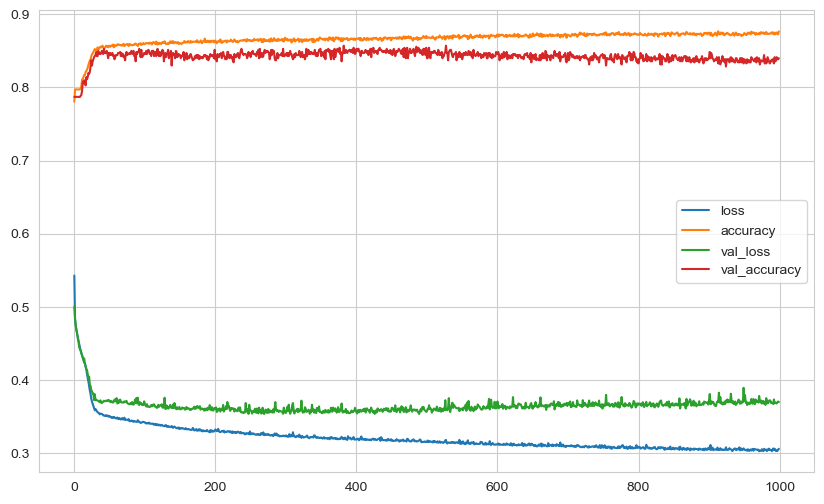

In [28]:
loss_df.plot()
plt.show()

In [29]:
model.evaluate(X_test, y_test, verbose=0)

[0.34655338525772095, 0.8600000143051147]

In [30]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34655338525772095
accuracy :  0.8600000143051147


In [31]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 692us/step
[[2297   92]
 [ 328  283]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.46      0.57       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [32]:
# defining class_weights

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [33]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [34]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5505 - val_loss: 0.6567 - val_accuracy: 0.6814
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6897 - val_loss: 0.6442 - val_accuracy: 0.6671
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6405 - val_loss: 0.6127 - val_accuracy: 0.6986
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6671 - val_loss: 0.6295 - val_accuracy: 0.6671
Epoch 5/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.6644 - val_loss: 0.6228 - val_accuracy: 0.6743
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6717 - val_loss: 0.6125 - val_accuracy: 0.6886
Epoch 7/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6576 - val_loss: 0.5778 - val_accuracy: 0.7129
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.7840 - val_loss: 0.5346 - val_accuracy: 0.7271
Epoch 59/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7829 - val_loss: 0.4453 - val_accuracy: 0.7829
Epoch 60/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7806 - val_loss: 0.4615 - val_accuracy: 0.7814
Epoch 61/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7848 - val_loss: 0.4416 - val_accuracy: 0.7886
Epoch 62/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7835 - val_loss: 0.4693 - val_accuracy: 0.7729
Epoch 63/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7833 - val_loss: 0.4584 - val_accuracy: 0.7786
Epoch 64/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7865 - val_loss: 0.4498 - val_accuracy: 0.7900
Epoch 65/1000

50/50 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.7967 - val_loss: 0.4648 - val_accuracy: 0.7743
Epoch 116/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7941 - val_loss: 0.4919 - val_accuracy: 0.7543
Epoch 117/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7948 - val_loss: 0.4794 - val_accuracy: 0.7571
Epoch 118/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.7949 - val_loss: 0.4626 - val_accuracy: 0.7743
Epoch 119/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7902 - val_loss: 0.4683 - val_accuracy: 0.7600
Epoch 120/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.7957 - val_loss: 0.4332 - val_accuracy: 0.8000
Epoch 121/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7898 - val_loss: 0.4537 - val_accuracy: 0.7657
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8021 - val_loss: 0.4581 - val_accuracy: 0.7700
Epoch 173/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7995 - val_loss: 0.4570 - val_accuracy: 0.7743
Epoch 174/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8013 - val_loss: 0.4369 - val_accuracy: 0.7871
Epoch 175/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7962 - val_loss: 0.3954 - val_accuracy: 0.8200
Epoch 176/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7981 - val_loss: 0.4231 - val_accuracy: 0.8000
Epoch 177/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7994 - val_loss: 0.4322 - val_accuracy: 0.7971
Epoch 178/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8002 - val_loss: 0.4374 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8016 - val_loss: 0.4232 - val_accuracy: 0.7986
Epoch 230/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8030 - val_loss: 0.4342 - val_accuracy: 0.7871
Epoch 231/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8046 - val_loss: 0.4803 - val_accuracy: 0.7771
Epoch 232/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7983 - val_loss: 0.4241 - val_accuracy: 0.7929
Epoch 233/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8037 - val_loss: 0.4463 - val_accuracy: 0.7714
Epoch 234/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7967 - val_loss: 0.4184 - val_accuracy: 0.8071
Epoch 235/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8017 - val_loss: 0.4236 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8014 - val_loss: 0.4158 - val_accuracy: 0.8071
Epoch 287/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8040 - val_loss: 0.4252 - val_accuracy: 0.7971
Epoch 288/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8003 - val_loss: 0.4449 - val_accuracy: 0.7800
Epoch 289/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8089 - val_loss: 0.4613 - val_accuracy: 0.7700
Epoch 290/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8056 - val_loss: 0.4497 - val_accuracy: 0.7786
Epoch 291/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8032 - val_loss: 0.4667 - val_accuracy: 0.7600
Epoch 292/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8049 - val_loss: 0.4412 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8005 - val_loss: 0.4217 - val_accuracy: 0.7943
Epoch 344/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8062 - val_loss: 0.4611 - val_accuracy: 0.7700
Epoch 345/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8076 - val_loss: 0.4581 - val_accuracy: 0.7786
Epoch 346/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8010 - val_loss: 0.4186 - val_accuracy: 0.7957
Epoch 347/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8081 - val_loss: 0.4347 - val_accuracy: 0.7829
Epoch 348/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8021 - val_loss: 0.4191 - val_accuracy: 0.7943
Epoch 349/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8102 - val_loss: 0.4332 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8089 - val_loss: 0.4247 - val_accuracy: 0.7943
Epoch 401/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8067 - val_loss: 0.4560 - val_accuracy: 0.7771
Epoch 402/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8059 - val_loss: 0.4493 - val_accuracy: 0.7843
Epoch 403/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8022 - val_loss: 0.4557 - val_accuracy: 0.7800
Epoch 404/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8073 - val_loss: 0.4351 - val_accuracy: 0.7929
Epoch 405/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8076 - val_loss: 0.4523 - val_accuracy: 0.7800
Epoch 406/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8038 - val_loss: 0.4315 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8108 - val_loss: 0.4571 - val_accuracy: 0.7829
Epoch 458/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8113 - val_loss: 0.4474 - val_accuracy: 0.7857
Epoch 459/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8033 - val_loss: 0.4316 - val_accuracy: 0.7943
Epoch 460/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8052 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 461/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8108 - val_loss: 0.4422 - val_accuracy: 0.7871
Epoch 462/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8076 - val_loss: 0.4131 - val_accuracy: 0.8014
Epoch 463/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8075 - val_loss: 0.4489 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8054 - val_loss: 0.4491 - val_accuracy: 0.7843
Epoch 515/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8070 - val_loss: 0.4222 - val_accuracy: 0.8057
Epoch 516/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8108 - val_loss: 0.4618 - val_accuracy: 0.7757
Epoch 517/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8090 - val_loss: 0.4540 - val_accuracy: 0.7829
Epoch 518/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8116 - val_loss: 0.4480 - val_accuracy: 0.7829
Epoch 519/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8073 - val_loss: 0.4475 - val_accuracy: 0.7814
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8087 - val_loss: 0.4099 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8106 - val_loss: 0.4373 - val_accuracy: 0.7929
Epoch 572/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8141 - val_loss: 0.4888 - val_accuracy: 0.7586
Epoch 573/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8062 - val_loss: 0.4233 - val_accuracy: 0.8000
Epoch 574/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8137 - val_loss: 0.4540 - val_accuracy: 0.7814
Epoch 575/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8103 - val_loss: 0.4268 - val_accuracy: 0.8014
Epoch 576/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8079 - val_loss: 0.4500 - val_accuracy: 0.7829
Epoch 577/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8063 - val_loss: 0.4450 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8132 - val_loss: 0.4385 - val_accuracy: 0.7871
Epoch 629/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8100 - val_loss: 0.4528 - val_accuracy: 0.7829
Epoch 630/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8127 - val_loss: 0.4407 - val_accuracy: 0.7914
Epoch 631/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8113 - val_loss: 0.4189 - val_accuracy: 0.8043
Epoch 632/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8089 - val_loss: 0.4212 - val_accuracy: 0.8000
Epoch 633/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8119 - val_loss: 0.4676 - val_accuracy: 0.7700
Epoch 634/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8086 - val_loss: 0.4378 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8125 - val_loss: 0.4201 - val_accuracy: 0.7943
Epoch 686/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8067 - val_loss: 0.4016 - val_accuracy: 0.8114
Epoch 687/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8137 - val_loss: 0.4285 - val_accuracy: 0.7886
Epoch 688/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8105 - val_loss: 0.4669 - val_accuracy: 0.7700
Epoch 689/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8102 - val_loss: 0.4106 - val_accuracy: 0.7986
Epoch 690/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8108 - val_loss: 0.4541 - val_accuracy: 0.7771
Epoch 691/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8116 - val_loss: 0.4315 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8089 - val_loss: 0.4229 - val_accuracy: 0.8029
Epoch 743/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8162 - val_loss: 0.4506 - val_accuracy: 0.7800
Epoch 744/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8168 - val_loss: 0.4537 - val_accuracy: 0.7800
Epoch 745/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8143 - val_loss: 0.5066 - val_accuracy: 0.7529
Epoch 746/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8062 - val_loss: 0.4585 - val_accuracy: 0.7786
Epoch 747/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8122 - val_loss: 0.4204 - val_accuracy: 0.8000
Epoch 748/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8117 - val_loss: 0.4298 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8148 - val_loss: 0.4759 - val_accuracy: 0.7600
Epoch 800/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8078 - val_loss: 0.4385 - val_accuracy: 0.7943
Epoch 801/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8167 - val_loss: 0.4469 - val_accuracy: 0.7771
Epoch 802/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8113 - val_loss: 0.4516 - val_accuracy: 0.7786
Epoch 803/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8113 - val_loss: 0.4332 - val_accuracy: 0.7886
Epoch 804/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8081 - val_loss: 0.4254 - val_accuracy: 0.7957
Epoch 805/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8122 - val_loss: 0.4520 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8110 - val_loss: 0.4381 - val_accuracy: 0.7886
Epoch 857/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8173 - val_loss: 0.4624 - val_accuracy: 0.7814
Epoch 858/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8154 - val_loss: 0.4938 - val_accuracy: 0.7557
Epoch 859/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8102 - val_loss: 0.4078 - val_accuracy: 0.8029
Epoch 860/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8162 - val_loss: 0.4561 - val_accuracy: 0.7771
Epoch 861/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8079 - val_loss: 0.4274 - val_accuracy: 0.7986
Epoch 862/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8086 - val_loss: 0.4519 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8127 - val_loss: 0.4398 - val_accuracy: 0.7886
Epoch 914/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8171 - val_loss: 0.4511 - val_accuracy: 0.7943
Epoch 915/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8092 - val_loss: 0.4487 - val_accuracy: 0.7971
Epoch 916/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8133 - val_loss: 0.5033 - val_accuracy: 0.7586
Epoch 917/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8113 - val_loss: 0.4779 - val_accuracy: 0.7700
Epoch 918/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8130 - val_loss: 0.4390 - val_accuracy: 0.7886
Epoch 919/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8106 - val_loss: 0.4302 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8156 - val_loss: 0.4735 - val_accuracy: 0.7729
Epoch 971/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8094 - val_loss: 0.4286 - val_accuracy: 0.7971
Epoch 972/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8122 - val_loss: 0.4174 - val_accuracy: 0.7986
Epoch 973/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8144 - val_loss: 0.4381 - val_accuracy: 0.7914
Epoch 974/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8146 - val_loss: 0.4724 - val_accuracy: 0.7700
Epoch 975/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8127 - val_loss: 0.4159 - val_accuracy: 0.8014
Epoch 976/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8127 - val_loss: 0.4665 - val_accuracy:

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 18)                252       
                                                                 
 dense_5 (Dense)             (None, 9)                 171       
                                                                 
 dense_6 (Dense)             (None, 5)                 50        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.695,0.550,0.657,0.681
1,0.673,0.690,0.644,0.667
2,0.656,0.640,0.613,0.699
3,0.640,0.667,0.629,0.667
4,0.630,0.664,0.623,0.674
...,...,...,...,...
995,0.408,0.814,0.438,0.784
996,0.410,0.812,0.438,0.794
997,0.408,0.813,0.459,0.779
998,0.412,0.812,0.462,0.780


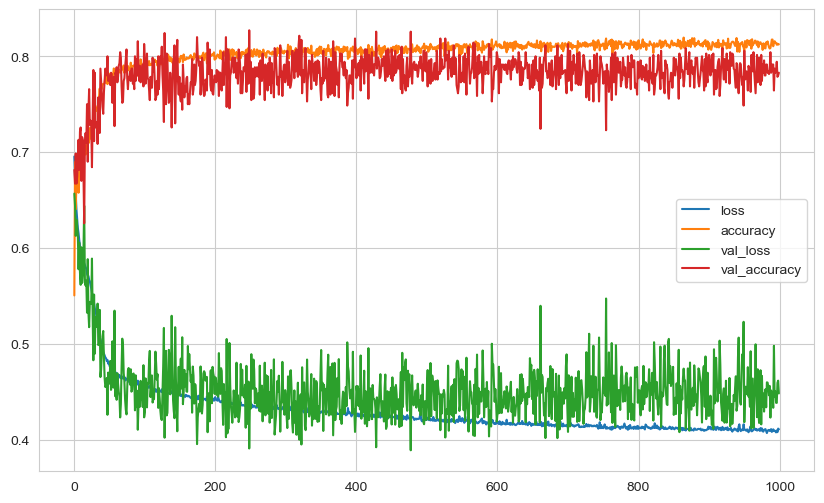

In [37]:
loss_df.plot()
plt.show()

In [38]:
model.evaluate(X_test, y_test, verbose=0)

[0.4602038562297821, 0.7820000052452087]

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4602038562297821
accuracy :  0.7820000052452087


In [40]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 822us/step
[[1888  501]
 [ 153  458]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2389
           1       0.48      0.75      0.58       611

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.83      0.78      0.80      3000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"]) # early stop'u accuracy'ye bakarak da yapabiliriz.

In [43]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5583 - val_loss: 0.6390 - val_accuracy: 0.6400
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6584 - val_loss: 0.6083 - val_accuracy: 0.6729
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6695 - val_loss: 0.5658 - val_accuracy: 0.7086
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.6811 - val_loss: 0.6503 - val_accuracy: 0.6414
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6754 - val_loss: 0.6042 - val_accuracy: 0.6700
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7037 - val_loss: 0.5951 - val_accuracy: 0.6757
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7024 - val_loss: 0.5313 - val_accuracy: 0.7571
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7849 - val_loss: 0.5174 - val_accuracy: 0.7371
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7937 - val_loss: 0.4463 - val_accuracy: 0.7743
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7922 - val_loss: 0.4569 - val_accuracy: 0.7714
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7894 - val_loss: 0.4368 - val_accuracy: 0.7814
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7952 - val_loss: 0.4402 - val_accuracy: 0.7857
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7913 - val_loss: 0.4331 - val_accuracy: 0.7829
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7968 - val_loss: 0.4538 - val_accuracy: 0.7714
Epoch 65/1000

50/50 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8010 - val_loss: 0.4767 - val_accuracy: 0.7643
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7983 - val_loss: 0.4710 - val_accuracy: 0.7600
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8000 - val_loss: 0.4825 - val_accuracy: 0.7529
Epoch 118/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8025 - val_loss: 0.5079 - val_accuracy: 0.7443
Epoch 119/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7921 - val_loss: 0.4738 - val_accuracy: 0.7586
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8003 - val_loss: 0.4663 - val_accuracy: 0.7700
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7919 - val_loss: 0.4425 - val_accuracy: 0.7714
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8049 - val_loss: 0.4469 - val_accuracy: 0.7729
Epoch 173/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7998 - val_loss: 0.4380 - val_accuracy: 0.7800
Epoch 174/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8032 - val_loss: 0.4691 - val_accuracy: 0.7629
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8005 - val_loss: 0.4052 - val_accuracy: 0.8086
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8040 - val_loss: 0.4462 - val_accuracy: 0.7714
Epoch 177/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8056 - val_loss: 0.4925 - val_accuracy: 0.7457
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.7948 - val_loss: 0.4280 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8029 - val_loss: 0.4385 - val_accuracy: 0.7914
Epoch 230/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8087 - val_loss: 0.4683 - val_accuracy: 0.7743
Epoch 231/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8111 - val_loss: 0.5131 - val_accuracy: 0.7486
Epoch 232/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8052 - val_loss: 0.4629 - val_accuracy: 0.7814
Epoch 233/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8111 - val_loss: 0.5108 - val_accuracy: 0.7486
Epoch 234/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7965 - val_loss: 0.4376 - val_accuracy: 0.8029
Epoch 235/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8070 - val_loss: 0.4571 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8094 - val_loss: 0.4339 - val_accuracy: 0.7986
Epoch 287/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8130 - val_loss: 0.4307 - val_accuracy: 0.8029
Epoch 288/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8068 - val_loss: 0.4294 - val_accuracy: 0.8029
Epoch 289/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8135 - val_loss: 0.4917 - val_accuracy: 0.7629
Epoch 290/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8067 - val_loss: 0.4858 - val_accuracy: 0.7586
Epoch 291/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8027 - val_loss: 0.4672 - val_accuracy: 0.7657
Epoch 292/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8062 - val_loss: 0.4710 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8100 - val_loss: 0.5024 - val_accuracy: 0.7557
Epoch 344/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8094 - val_loss: 0.4898 - val_accuracy: 0.7614
Epoch 345/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8152 - val_loss: 0.5398 - val_accuracy: 0.7429
Epoch 346/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8075 - val_loss: 0.4508 - val_accuracy: 0.7843
Epoch 347/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8137 - val_loss: 0.5347 - val_accuracy: 0.7614
Epoch 348/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8071 - val_loss: 0.4833 - val_accuracy: 0.7686
Epoch 349/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8105 - val_loss: 0.4904 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8148 - val_loss: 0.4632 - val_accuracy: 0.7729
Epoch 401/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8098 - val_loss: 0.4933 - val_accuracy: 0.7643
Epoch 402/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8116 - val_loss: 0.4639 - val_accuracy: 0.7900
Epoch 403/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8130 - val_loss: 0.4744 - val_accuracy: 0.7771
Epoch 404/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8111 - val_loss: 0.4998 - val_accuracy: 0.7614
Epoch 405/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8133 - val_loss: 0.4976 - val_accuracy: 0.7671
Epoch 406/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8113 - val_loss: 0.4933 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8151 - val_loss: 0.5184 - val_accuracy: 0.7600
Epoch 458/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8121 - val_loss: 0.5486 - val_accuracy: 0.7386
Epoch 459/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8065 - val_loss: 0.4526 - val_accuracy: 0.7971
Epoch 460/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8094 - val_loss: 0.4521 - val_accuracy: 0.7929
Epoch 461/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8111 - val_loss: 0.5095 - val_accuracy: 0.7643
Epoch 462/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8116 - val_loss: 0.4845 - val_accuracy: 0.7686
Epoch 463/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8068 - val_loss: 0.5213 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8124 - val_loss: 0.5129 - val_accuracy: 0.7543
Epoch 515/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8121 - val_loss: 0.4699 - val_accuracy: 0.7886
Epoch 516/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8071 - val_loss: 0.5219 - val_accuracy: 0.7500
Epoch 517/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8108 - val_loss: 0.4823 - val_accuracy: 0.7714
Epoch 518/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8165 - val_loss: 0.5104 - val_accuracy: 0.7586
Epoch 519/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8140 - val_loss: 0.4925 - val_accuracy: 0.7671
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8089 - val_loss: 0.4685 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8068 - val_loss: 0.4806 - val_accuracy: 0.7714
Epoch 572/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8138 - val_loss: 0.5261 - val_accuracy: 0.7629
Epoch 573/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8105 - val_loss: 0.5059 - val_accuracy: 0.7671
Epoch 574/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8121 - val_loss: 0.5484 - val_accuracy: 0.7400
Epoch 575/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8137 - val_loss: 0.4876 - val_accuracy: 0.7757
Epoch 576/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8121 - val_loss: 0.5072 - val_accuracy: 0.7643
Epoch 577/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8049 - val_loss: 0.4959 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8148 - val_loss: 0.5243 - val_accuracy: 0.7586
Epoch 629/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8062 - val_loss: 0.4974 - val_accuracy: 0.7729
Epoch 630/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8144 - val_loss: 0.5330 - val_accuracy: 0.7543
Epoch 631/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8125 - val_loss: 0.5044 - val_accuracy: 0.7714
Epoch 632/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8102 - val_loss: 0.4996 - val_accuracy: 0.7729
Epoch 633/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8132 - val_loss: 0.4911 - val_accuracy: 0.7786
Epoch 634/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8100 - val_loss: 0.4850 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8125 - val_loss: 0.4903 - val_accuracy: 0.7771
Epoch 686/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8100 - val_loss: 0.4981 - val_accuracy: 0.7714
Epoch 687/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8151 - val_loss: 0.4740 - val_accuracy: 0.7957
Epoch 688/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8113 - val_loss: 0.5509 - val_accuracy: 0.7429
Epoch 689/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8157 - val_loss: 0.4869 - val_accuracy: 0.7771
Epoch 690/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8070 - val_loss: 0.5714 - val_accuracy: 0.7400
Epoch 691/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8114 - val_loss: 0.5226 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8030 - val_loss: 0.4857 - val_accuracy: 0.7886
Epoch 743/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8167 - val_loss: 0.5033 - val_accuracy: 0.7729
Epoch 744/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8170 - val_loss: 0.5128 - val_accuracy: 0.7671
Epoch 745/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8122 - val_loss: 0.5771 - val_accuracy: 0.7314
Epoch 746/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8076 - val_loss: 0.5084 - val_accuracy: 0.7614
Epoch 747/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8167 - val_loss: 0.4967 - val_accuracy: 0.7743
Epoch 748/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8165 - val_loss: 0.5228 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8124 - val_loss: 0.5540 - val_accuracy: 0.7486
Epoch 800/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8086 - val_loss: 0.5176 - val_accuracy: 0.7614
Epoch 801/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8152 - val_loss: 0.5210 - val_accuracy: 0.7643
Epoch 802/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8129 - val_loss: 0.5244 - val_accuracy: 0.7671
Epoch 803/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8159 - val_loss: 0.5430 - val_accuracy: 0.7529
Epoch 804/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8117 - val_loss: 0.4955 - val_accuracy: 0.7757
Epoch 805/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8129 - val_loss: 0.5244 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8144 - val_loss: 0.5090 - val_accuracy: 0.7771
Epoch 857/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8140 - val_loss: 0.5723 - val_accuracy: 0.7343
Epoch 858/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8097 - val_loss: 0.5354 - val_accuracy: 0.7529
Epoch 859/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8165 - val_loss: 0.4973 - val_accuracy: 0.7800
Epoch 860/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8195 - val_loss: 0.5475 - val_accuracy: 0.7486
Epoch 861/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8090 - val_loss: 0.5143 - val_accuracy: 0.7743
Epoch 862/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8149 - val_loss: 0.5167 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8162 - val_loss: 0.5034 - val_accuracy: 0.7857
Epoch 914/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8184 - val_loss: 0.5210 - val_accuracy: 0.7700
Epoch 915/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8102 - val_loss: 0.4996 - val_accuracy: 0.7700
Epoch 916/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8160 - val_loss: 0.5692 - val_accuracy: 0.7371
Epoch 917/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8116 - val_loss: 0.5544 - val_accuracy: 0.7500
Epoch 918/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8175 - val_loss: 0.5288 - val_accuracy: 0.7586
Epoch 919/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8146 - val_loss: 0.5104 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8183 - val_loss: 0.5630 - val_accuracy: 0.7471
Epoch 971/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8135 - val_loss: 0.5258 - val_accuracy: 0.7629
Epoch 972/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8137 - val_loss: 0.5415 - val_accuracy: 0.7514
Epoch 973/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8140 - val_loss: 0.5025 - val_accuracy: 0.7800
Epoch 974/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8163 - val_loss: 0.5677 - val_accuracy: 0.7400
Epoch 975/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8143 - val_loss: 0.5107 - val_accuracy: 0.7929
Epoch 976/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8138 - val_loss: 0.5709 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.671,0.558,0.639,0.640
1,0.630,0.658,0.608,0.673
2,0.614,0.670,0.566,0.709
3,0.603,0.681,0.650,0.641
4,0.600,0.675,0.604,0.670
...,...,...,...,...
995,0.389,0.824,0.541,0.749
996,0.390,0.817,0.512,0.777
997,0.391,0.815,0.555,0.743
998,0.397,0.816,0.568,0.734


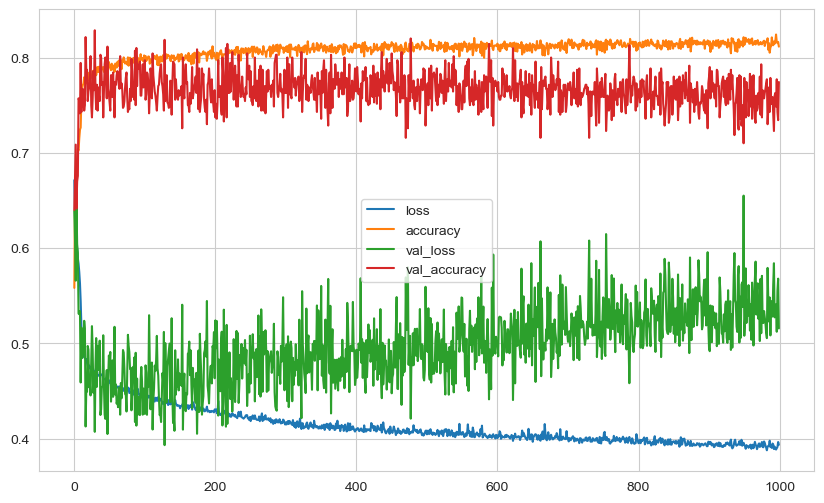

In [45]:
loss_df.plot()
plt.show()

In [46]:
model.evaluate(X_test, y_test, verbose=0)

[0.4933604300022125, 0.7839999794960022]

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4933604300022125
accuracy :  0.7839999794960022


In [48]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 862us/step
[[1910  479]
 [ 169  442]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2389
           1       0.48      0.72      0.58       611

    accuracy                           0.78      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.78      0.80      3000



### Add Dropout Layer

In [49]:
from tensorflow.keras.layers import Dropout

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 4ms/step - loss: 0.7202 - accuracy: 0.5213 - val_loss: 0.6733 - val_accuracy: 0.6271
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4265 - val_loss: 0.6790 - val_accuracy: 0.6143
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.3965 - val_loss: 0.6838 - val_accuracy: 0.5600
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4741 - val_loss: 0.6850 - val_accuracy: 0.6629
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4213 - val_loss: 0.6854 - val_accuracy: 0.6843
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.6863 - val_loss: 0.6854 - val_accuracy: 0.6900
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.4837 - val_loss: 0.6822 - val_accuracy: 0.6943
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.7124 - val_loss: 0.5845 - val_accuracy: 0.7429
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7108 - val_loss: 0.5764 - val_accuracy: 0.7500
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.7144 - val_loss: 0.5811 - val_accuracy: 0.7500
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6856 - val_loss: 0.5976 - val_accuracy: 0.7300
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7119 - val_loss: 0.5792 - val_accuracy: 0.7486
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.7195 - val_loss: 0.5859 - val_accuracy: 0.7371
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7062 - val_loss: 0.5853 - val_accuracy: 0.7471
Epoch 65/1000

50/50 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.6867 - val_loss: 0.5277 - val_accuracy: 0.7700
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.6833 - val_loss: 0.5290 - val_accuracy: 0.7543
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6732 - val_loss: 0.5385 - val_accuracy: 0.7529
Epoch 118/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6824 - val_loss: 0.5239 - val_accuracy: 0.7757
Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.6879 - val_loss: 0.5468 - val_accuracy: 0.7500
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6637 - val_loss: 0.5235 - val_accuracy: 0.7657
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6843 - val_loss: 0.5428 - val_accuracy: 0.7386
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6860 - val_loss: 0.5416 - val_accuracy: 0.7543
Epoch 173/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.6944 - val_loss: 0.5202 - val_accuracy: 0.7629
Epoch 174/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.6849 - val_loss: 0.5160 - val_accuracy: 0.7586
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.6833 - val_loss: 0.5291 - val_accuracy: 0.7600
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.6811 - val_loss: 0.5252 - val_accuracy: 0.7543
Epoch 177/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.6956 - val_loss: 0.5187 - val_accuracy: 0.7500
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.6710 - val_loss: 0.5077 - val_accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6862 - val_loss: 0.5337 - val_accuracy: 0.7729
Epoch 230/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6840 - val_loss: 0.5315 - val_accuracy: 0.7514
Epoch 231/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.6819 - val_loss: 0.5261 - val_accuracy: 0.7471
Epoch 232/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.6798 - val_loss: 0.5332 - val_accuracy: 0.7443
Epoch 233/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.6787 - val_loss: 0.5275 - val_accuracy: 0.7486
Epoch 234/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.6751 - val_loss: 0.5345 - val_accuracy: 0.7500
Epoch 235/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.6763 - val_loss: 0.5156 - val_accuracy:

Epoch 286/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6798 - val_loss: 0.5172 - val_accuracy: 0.7586
Epoch 287/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6771 - val_loss: 0.5344 - val_accuracy: 0.7543
Epoch 288/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.6822 - val_loss: 0.5215 - val_accuracy: 0.7686
Epoch 289/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.6922 - val_loss: 0.5166 - val_accuracy: 0.7657
Epoch 290/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.6829 - val_loss: 0.5181 - val_accuracy: 0.7543
Epoch 291/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.6884 - val_loss: 0.5277 - val_accuracy: 0.7543
Epoch 292/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.6897 - val_loss: 0.5199 - val_accuracy:

Epoch 343/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.6795 - val_loss: 0.4936 - val_accuracy: 0.7843
Epoch 344/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.6948 - val_loss: 0.4953 - val_accuracy: 0.7857
Epoch 345/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.6902 - val_loss: 0.4888 - val_accuracy: 0.7929
Epoch 346/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.6856 - val_loss: 0.4896 - val_accuracy: 0.7943
Epoch 347/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.6992 - val_loss: 0.4999 - val_accuracy: 0.7786
Epoch 348/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.6789 - val_loss: 0.5009 - val_accuracy: 0.7871
Epoch 349/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.6829 - val_loss: 0.5036 - val_accuracy:

Epoch 400/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.6862 - val_loss: 0.5231 - val_accuracy: 0.7500
Epoch 401/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.6978 - val_loss: 0.5045 - val_accuracy: 0.7771
Epoch 402/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.6922 - val_loss: 0.5180 - val_accuracy: 0.7443
Epoch 403/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6833 - val_loss: 0.5051 - val_accuracy: 0.7614
Epoch 404/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7044 - val_loss: 0.5084 - val_accuracy: 0.7614
Epoch 405/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.6951 - val_loss: 0.5273 - val_accuracy: 0.7543
Epoch 406/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.6933 - val_loss: 0.5106 - val_accuracy:

Epoch 457/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.6967 - val_loss: 0.5086 - val_accuracy: 0.7429
Epoch 458/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.6727 - val_loss: 0.5188 - val_accuracy: 0.7257
Epoch 459/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.6938 - val_loss: 0.4962 - val_accuracy: 0.7614
Epoch 460/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.6938 - val_loss: 0.5130 - val_accuracy: 0.7557
Epoch 461/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.6821 - val_loss: 0.5027 - val_accuracy: 0.7657
Epoch 462/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.6971 - val_loss: 0.5121 - val_accuracy: 0.7614
Epoch 463/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7033 - val_loss: 0.4962 - val_accuracy:

Epoch 514/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.6944 - val_loss: 0.5383 - val_accuracy: 0.7671
Epoch 515/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7027 - val_loss: 0.4962 - val_accuracy: 0.7971
Epoch 516/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7037 - val_loss: 0.5071 - val_accuracy: 0.7643
Epoch 517/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.6902 - val_loss: 0.5032 - val_accuracy: 0.7771
Epoch 518/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.6838 - val_loss: 0.5150 - val_accuracy: 0.7414
Epoch 519/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.6816 - val_loss: 0.4968 - val_accuracy: 0.7743
Epoch 520/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7010 - val_loss: 0.4937 - val_accuracy:

Epoch 571/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.6795 - val_loss: 0.5245 - val_accuracy: 0.7514
Epoch 572/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.6965 - val_loss: 0.4916 - val_accuracy: 0.7814
Epoch 573/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.6771 - val_loss: 0.4956 - val_accuracy: 0.7714
Epoch 574/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.6976 - val_loss: 0.4967 - val_accuracy: 0.7657
Epoch 575/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.6987 - val_loss: 0.4956 - val_accuracy: 0.7757
Epoch 576/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7016 - val_loss: 0.4993 - val_accuracy: 0.7543
Epoch 577/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.6937 - val_loss: 0.5250 - val_accuracy:

Epoch 628/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.6890 - val_loss: 0.5229 - val_accuracy: 0.7514
Epoch 629/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.6908 - val_loss: 0.4875 - val_accuracy: 0.7829
Epoch 630/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.6917 - val_loss: 0.5047 - val_accuracy: 0.7629
Epoch 631/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.6921 - val_loss: 0.4970 - val_accuracy: 0.7771
Epoch 632/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.6911 - val_loss: 0.5090 - val_accuracy: 0.7643
Epoch 633/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.6979 - val_loss: 0.4969 - val_accuracy: 0.7786
Epoch 634/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7049 - val_loss: 0.4921 - val_accuracy:

Epoch 685/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.6913 - val_loss: 0.4983 - val_accuracy: 0.7500
Epoch 686/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7030 - val_loss: 0.4929 - val_accuracy: 0.7871
Epoch 687/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.6973 - val_loss: 0.4996 - val_accuracy: 0.7743
Epoch 688/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.6875 - val_loss: 0.5068 - val_accuracy: 0.7629
Epoch 689/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.6932 - val_loss: 0.4891 - val_accuracy: 0.7814
Epoch 690/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7113 - val_loss: 0.5066 - val_accuracy: 0.7643
Epoch 691/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.6833 - val_loss: 0.5052 - val_accuracy:

Epoch 742/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.6852 - val_loss: 0.4953 - val_accuracy: 0.7914
Epoch 743/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7132 - val_loss: 0.5013 - val_accuracy: 0.7714
Epoch 744/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7048 - val_loss: 0.5040 - val_accuracy: 0.7571
Epoch 745/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.6916 - val_loss: 0.5185 - val_accuracy: 0.7514
Epoch 746/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.6976 - val_loss: 0.4988 - val_accuracy: 0.7700
Epoch 747/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7056 - val_loss: 0.5000 - val_accuracy: 0.7729
Epoch 748/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6978 - val_loss: 0.5041 - val_accuracy:

Epoch 799/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7049 - val_loss: 0.4829 - val_accuracy: 0.7800
Epoch 800/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.6856 - val_loss: 0.4903 - val_accuracy: 0.7800
Epoch 801/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.6957 - val_loss: 0.5055 - val_accuracy: 0.7614
Epoch 802/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.6941 - val_loss: 0.4995 - val_accuracy: 0.7700
Epoch 803/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7002 - val_loss: 0.4889 - val_accuracy: 0.7786
Epoch 804/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.6963 - val_loss: 0.5033 - val_accuracy: 0.7714
Epoch 805/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.6983 - val_loss: 0.4998 - val_accuracy:

Epoch 856/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.6960 - val_loss: 0.5020 - val_accuracy: 0.7543
Epoch 857/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.6979 - val_loss: 0.4961 - val_accuracy: 0.7743
Epoch 858/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.6960 - val_loss: 0.4951 - val_accuracy: 0.7771
Epoch 859/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.6881 - val_loss: 0.5197 - val_accuracy: 0.7500
Epoch 860/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.6898 - val_loss: 0.5055 - val_accuracy: 0.7714
Epoch 861/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7067 - val_loss: 0.5019 - val_accuracy: 0.7729
Epoch 862/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.6903 - val_loss: 0.5102 - val_accuracy:

Epoch 913/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.6937 - val_loss: 0.5132 - val_accuracy: 0.7457
Epoch 914/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.6922 - val_loss: 0.5007 - val_accuracy: 0.7657
Epoch 915/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6868 - val_loss: 0.5218 - val_accuracy: 0.7429
Epoch 916/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.6886 - val_loss: 0.5242 - val_accuracy: 0.7471
Epoch 917/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.6960 - val_loss: 0.5087 - val_accuracy: 0.7429
Epoch 918/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.6971 - val_loss: 0.5154 - val_accuracy: 0.7357
Epoch 919/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.6867 - val_loss: 0.4980 - val_accuracy:

Epoch 970/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7178 - val_loss: 0.4760 - val_accuracy: 0.7971
Epoch 971/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7078 - val_loss: 0.4897 - val_accuracy: 0.7743
Epoch 972/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.6848 - val_loss: 0.4824 - val_accuracy: 0.7729
Epoch 973/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.6946 - val_loss: 0.5124 - val_accuracy: 0.7457
Epoch 974/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.6921 - val_loss: 0.4923 - val_accuracy: 0.7714
Epoch 975/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.6997 - val_loss: 0.4923 - val_accuracy: 0.7643
Epoch 976/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.6968 - val_loss: 0.5005 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.720,0.521,0.673,0.627
1,0.698,0.427,0.679,0.614
2,0.693,0.397,0.684,0.560
3,0.690,0.474,0.685,0.663
4,0.690,0.421,0.685,0.684
...,...,...,...,...
995,0.552,0.694,0.494,0.749
996,0.570,0.681,0.490,0.759
997,0.562,0.689,0.483,0.776
998,0.553,0.704,0.485,0.774


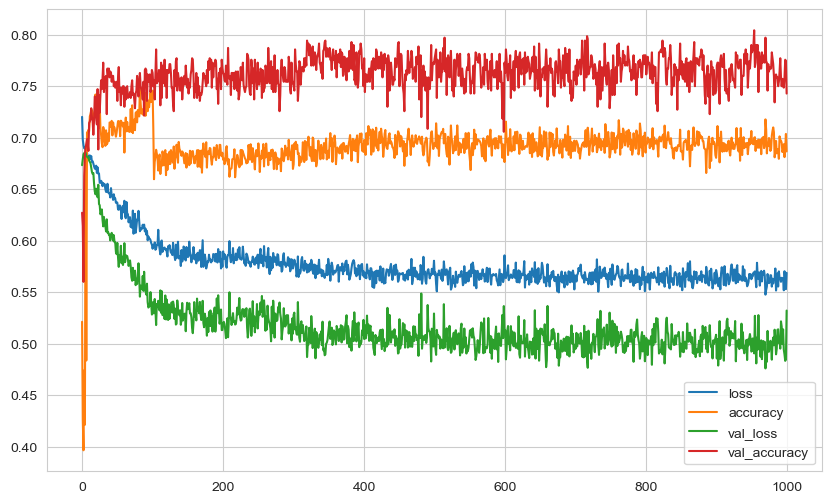

In [53]:
loss_df.plot()
plt.show()

In [54]:
model.evaluate(X_test, y_test, verbose=0)

[0.5369634628295898, 0.7433333396911621]

In [55]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5369634628295898
accuracy :  0.7433333396911621


In [56]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 915us/step
[[1715  674]
 [  96  515]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2389
           1       0.43      0.84      0.57       611

    accuracy                           0.74      3000
   macro avg       0.69      0.78      0.69      3000
weighted avg       0.84      0.74      0.77      3000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [60]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 4ms/step - loss: 0.6910 - accuracy: 0.7889 - val_loss: 0.6736 - val_accuracy: 0.7714
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.7722 - val_loss: 0.6518 - val_accuracy: 0.7371
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.7224 - val_loss: 0.6218 - val_accuracy: 0.7043
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7073 - val_loss: 0.6216 - val_accuracy: 0.6743
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6563 - val_loss: 0.6109 - val_accuracy: 0.6614
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6584 - val_loss: 0.6075 - val_accuracy: 0.6657
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6429 - val_loss: 0.5883 - val_accuracy: 0.6957
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7611 - val_loss: 0.5547 - val_accuracy: 0.7057
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7629 - val_loss: 0.4687 - val_accuracy: 0.7671
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7632 - val_loss: 0.4569 - val_accuracy: 0.7786
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7673 - val_loss: 0.4517 - val_accuracy: 0.7757
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7635 - val_loss: 0.4655 - val_accuracy: 0.7671
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7640 - val_loss: 0.4705 - val_accuracy: 0.7657
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7705 - val_loss: 0.4579 - val_accuracy: 0.7729
Epoch 65/1000

50/50 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7792 - val_loss: 0.4548 - val_accuracy: 0.7829
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7790 - val_loss: 0.4907 - val_accuracy: 0.7629
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7802 - val_loss: 0.4854 - val_accuracy: 0.7614
Epoch 118/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7810 - val_loss: 0.4846 - val_accuracy: 0.7671
Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7716 - val_loss: 0.4727 - val_accuracy: 0.7729
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7813 - val_loss: 0.4402 - val_accuracy: 0.7900
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7741 - val_loss: 0.4619 - val_accuracy: 0.7814
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7867 - val_loss: 0.4558 - val_accuracy: 0.7857
Epoch 173/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7871 - val_loss: 0.4611 - val_accuracy: 0.7843
Epoch 174/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4582 - accuracy: 0.7827 - val_loss: 0.4445 - val_accuracy: 0.7943
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7835 - val_loss: 0.4079 - val_accuracy: 0.8214
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7852 - val_loss: 0.4252 - val_accuracy: 0.8029
Epoch 177/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7849 - val_loss: 0.4408 - val_accuracy: 0.7943
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7857 - val_loss: 0.4261 - val_accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.691,0.789,0.674,0.771
1,0.684,0.772,0.652,0.737
2,0.671,0.722,0.622,0.704
3,0.656,0.707,0.622,0.674
4,0.644,0.656,0.611,0.661
...,...,...,...,...
174,0.454,0.783,0.408,0.821
175,0.458,0.785,0.425,0.803
176,0.458,0.785,0.441,0.794
177,0.454,0.786,0.426,0.804


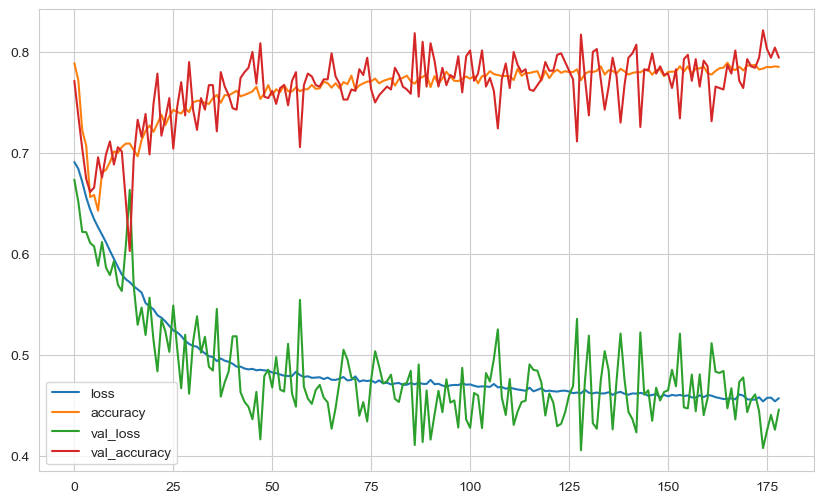

In [62]:
loss_df.plot()
plt.show()

In [63]:
model.evaluate(X_test, y_test, verbose=0)

[0.3962131440639496, 0.8270000219345093]

In [64]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3962131440639496
accuracy :  0.8270000219345093


In [65]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 850us/step
[[2063  326]
 [ 193  418]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2389
           1       0.56      0.68      0.62       611

    accuracy                           0.83      3000
   macro avg       0.74      0.77      0.75      3000
weighted avg       0.84      0.83      0.83      3000



#### Monitor the "val_recall" as metric

In [66]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [67]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

In [68]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.7016 - recall: 0.0086 - val_loss: 0.6714 - val_recall: 0.0470
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6898 - recall: 0.1472 - val_loss: 0.6737 - val_recall: 0.2819
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6834 - recall: 0.3540 - val_loss: 0.6480 - val_recall: 0.2617
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6747 - recall: 0.3297 - val_loss: 0.6232 - val_recall: 0.4899
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6632 - recall: 0.4879 - val_loss: 0.6068 - val_recall: 0.5973
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6494 - recall: 0.5560 - val_loss: 0.5889 - val_recall: 0.6376
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6376 - recall: 0.6664 - val_loss: 0.5714 - val_recall: 0.6443
Epoch 8/1000
50/50 [==============

50/50 [==============================] - 0s 2ms/step - loss: 0.4821 - recall: 0.7518 - val_loss: 0.4818 - val_recall: 0.7651
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4805 - recall: 0.7565 - val_loss: 0.4587 - val_recall: 0.7517
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4815 - recall: 0.7533 - val_loss: 0.4672 - val_recall: 0.7517
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4804 - recall: 0.7494 - val_loss: 0.4576 - val_recall: 0.7517
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4805 - recall: 0.7455 - val_loss: 0.4576 - val_recall: 0.7517
Epoch 65/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4814 - recall: 0.7502 - val_loss: 0.4498 - val_recall: 0.7517
Epoch 66/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4781 - recall: 0.7604 - val_loss: 0.4305 - val_recall: 0.7450
Epoch 67/1000
50/50 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.702,0.009,0.671,0.047
1,0.690,0.147,0.674,0.282
2,0.683,0.354,0.648,0.262
3,0.675,0.330,0.623,0.490
4,0.663,0.488,0.607,0.597
...,...,...,...,...
110,0.469,0.758,0.472,0.758
111,0.468,0.762,0.417,0.725
112,0.469,0.758,0.447,0.758
113,0.467,0.762,0.448,0.758


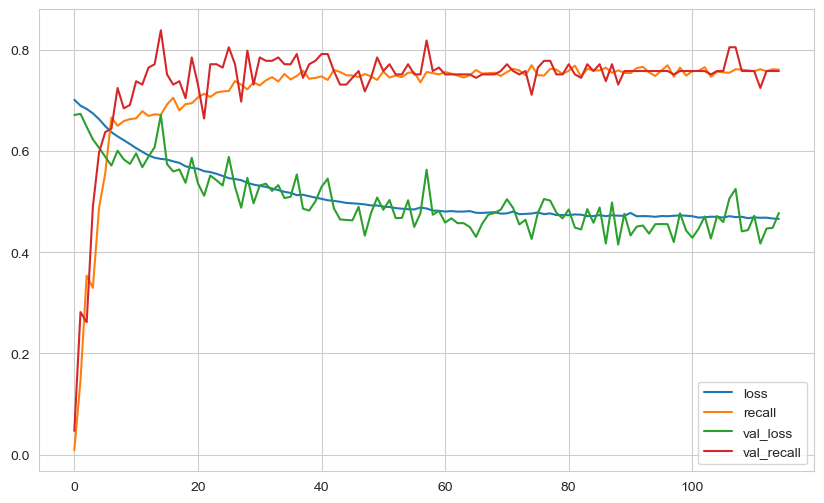

In [70]:
loss_df.plot()
plt.show()

In [71]:
model.evaluate(X_test, y_test, verbose=0)

[0.6776204705238342, 0.8543371558189392]

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6776204705238342
accuracy :  0.8543371558189392


In [73]:
y_pred = model.predict(X_test) > 0.5  # model burada probability ürettiği için probebailitynin 1 ve 0'a dönüştürülmesi için
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 853us/step
[[1280 1109]
 [  89  522]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68      2389
           1       0.32      0.85      0.47       611

    accuracy                           0.60      3000
   macro avg       0.63      0.70      0.57      3000
weighted avg       0.81      0.60      0.64      3000



## GridSearchCV

In [74]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [75]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [76]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

In [77]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [78]:
grid_model.fit(X_train, y_train, class_weight=class_weights, callbacks = [early_stop])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Epoch 1/200
99/99 [==============================] - 1s 3ms/step - loss: 0.6891 - recall: 0.4182 - val_loss: 0.6737 - val_recall: 0.4430
Epoch 2/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6891 - recall: 0.4385 - val_loss: 0.6736 - val_recall: 0.4430
Epoch 3/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6891 - recall: 0.4385 - val_loss: 0.6736 - val_recall: 0.4430
Epoch 4/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6890 - recall: 0.4385 - val_loss: 0.6735 - val_recall: 0.4430
Epoch 5/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6890 - recall: 0.4393 - val_loss: 0.6734 - val_recall: 0.4430
Epoch 6/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6889 - recall: 0.4377 - val_loss: 0.6733 - val_recall: 0.4430
Epoch 7/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6889 - recall: 0.4377 - val_loss: 0.6733 -

Epoch 60/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6867 - recall: 0.4620 - val_loss: 0.6687 - val_recall: 0.4698
Epoch 61/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6867 - recall: 0.4628 - val_loss: 0.6686 - val_recall: 0.4698
Epoch 62/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6867 - recall: 0.4628 - val_loss: 0.6685 - val_recall: 0.4698
Epoch 63/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6866 - recall: 0.4620 - val_loss: 0.6684 - val_recall: 0.4698
Epoch 64/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6866 - recall: 0.4628 - val_loss: 0.6683 - val_recall: 0.4765
Epoch 65/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6865 - recall: 0.4644 - val_loss: 0.6683 - val_recall: 0.4765
Epoch 66/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6865 - recall: 0.4644 - val_loss: 0.6682 - val_recall: 0.4765
Epoch 67/200
99/99 [==============

99/99 [==============================] - 0s 1ms/step - loss: 0.6839 - recall: 0.4785 - val_loss: 0.6622 - val_recall: 0.4899
Epoch 120/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6838 - recall: 0.4792 - val_loss: 0.6621 - val_recall: 0.4899
Epoch 121/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6838 - recall: 0.4792 - val_loss: 0.6619 - val_recall: 0.4899
Epoch 122/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6837 - recall: 0.4792 - val_loss: 0.6618 - val_recall: 0.4899
Epoch 123/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6837 - recall: 0.4800 - val_loss: 0.6616 - val_recall: 0.4899
Epoch 124/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6836 - recall: 0.4800 - val_loss: 0.6615 - val_recall: 0.4899
Epoch 125/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6836 - recall: 0.4808 - val_loss: 0.6614 - val_recall: 0.4899
Epoch 126/200
99/99 [====================

99/99 [==============================] - 0s 2ms/step - loss: 0.6805 - recall: 0.4847 - val_loss: 0.6542 - val_recall: 0.4698
Epoch 179/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6805 - recall: 0.4863 - val_loss: 0.6540 - val_recall: 0.4698
Epoch 180/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6804 - recall: 0.4863 - val_loss: 0.6539 - val_recall: 0.4698
Epoch 181/200
99/99 [==============================] - 0s 2ms/step - loss: 0.6803 - recall: 0.4871 - val_loss: 0.6537 - val_recall: 0.4698
Epoch 182/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6803 - recall: 0.4879 - val_loss: 0.6536 - val_recall: 0.4698
Epoch 183/200
99/99 [==============================] - 0s 1ms/step - loss: 0.6802 - recall: 0.4894 - val_loss: 0.6534 - val_recall: 0.4698
Epoch 184/200
99/99 [==============================] - 0s 2ms/step - loss: 0.6802 - recall: 0.4910 - val_loss: 0.6533 - val_recall: 0.4698
Epoch 185/200
99/99 [====================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000197C0120E20>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64], 'learn_rate': [0.001, 0.003],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [79]:
grid_model.best_score_

0.8847274797072322

In [80]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.adadelta.Adadelta}

In [81]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
14,0.885,0.172,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
5,0.872,0.015,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
13,0.865,0.018,3,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
4,0.854,0.035,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.844,0.029,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
0,0.839,0.030,6,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
12,0.826,0.058,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
1,0.826,0.070,8,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.824,0.031,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
15,0.821,0.049,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [82]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 848us/step
[[1599  790]
 [ 310  301]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74      2389
           1       0.28      0.49      0.35       611

    accuracy                           0.63      3000
   macro avg       0.56      0.58      0.55      3000
weighted avg       0.72      0.63      0.66      3000



### ROC (Receiver Operating Characteristic Curve) and AUC (Area Under Curve)¶

94/94 [==============================] - 0s 831us/step


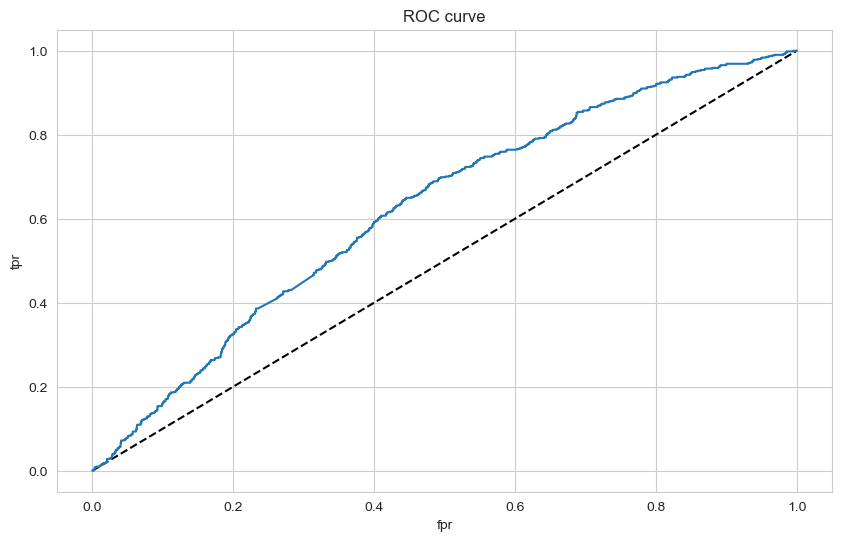

In [83]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [84]:
roc_auc_score(y_test, y_pred_proba)

0.6228424194634573

# Final Model and Model Deployment

In [85]:
import pickle

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = seed)

In [87]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [88]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [89]:
pickle.dump(column_trans, open("column_trans", 'wb'))

In [90]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [91]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [92]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          class_weight=class_weights, callbacks = [early_stop])

Epoch 1/1000
219/219 [==============================] - 1s 2ms/step - loss: 0.6433 - recall: 0.6760 - val_loss: 0.5661 - val_recall: 0.5876
Epoch 2/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.6043 - recall: 0.6557 - val_loss: 0.6849 - val_recall: 0.8412
Epoch 3/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5877 - recall: 0.6816 - val_loss: 0.5932 - val_recall: 0.7627
Epoch 4/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5773 - recall: 0.6872 - val_loss: 0.5215 - val_recall: 0.6547
Epoch 5/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5669 - recall: 0.6830 - val_loss: 0.5622 - val_recall: 0.7643
Epoch 6/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5480 - recall: 0.7111 - val_loss: 0.5360 - val_recall: 0.7856
Epoch 7/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5352 - recall: 0.7160 - val_loss: 0.4978 - val_recall: 0.7430
Epoch 8/1000
219/219

In [93]:
model.history.history

{'loss': [0.6433033347129822,
  0.6042995452880859,
  0.5877336263656616,
  0.5772651433944702,
  0.5669187903404236,
  0.5479510426521301,
  0.5351635813713074,
  0.522418737411499,
  0.5136922597885132,
  0.508790135383606,
  0.5046098828315735,
  0.502688467502594,
  0.4988403022289276,
  0.4947296380996704,
  0.4946664273738861,
  0.4930955767631531,
  0.48799046874046326,
  0.4891338646411896,
  0.48658275604248047,
  0.486284077167511,
  0.4863998293876648,
  0.4876464903354645,
  0.4823245108127594,
  0.4832231104373932,
  0.48142024874687195,
  0.48029667139053345,
  0.48063573241233826],
 'recall': [0.6760168075561523,
  0.655680239200592,
  0.6816269159317017,
  0.687237024307251,
  0.6830294728279114,
  0.7110799551010132,
  0.7159887552261353,
  0.7265077233314514,
  0.7335203289985657,
  0.7461430430412292,
  0.7426367402076721,
  0.7419354915618896,
  0.747545599937439,
  0.7545582056045532,
  0.7538569569587708,
  0.7629733681678772,
  0.747545599937439,
  0.748948097229

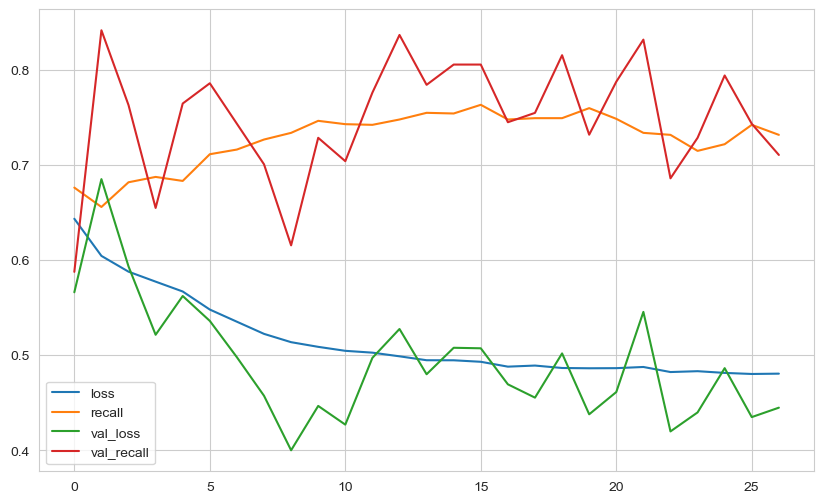

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [95]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6849085092544556
recall :  0.8412438631057739


In [96]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 750us/step
[[1283 1106]
 [  97  514]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68      2389
           1       0.32      0.84      0.46       611

    accuracy                           0.60      3000
   macro avg       0.62      0.69      0.57      3000
weighted avg       0.80      0.60      0.64      3000



In [97]:
model.save('model_customer_churn.h5')

## Prediction

In [98]:
# Loading Model

from tensorflow.keras.models import load_model
model_churn = load_model('model_customer_churn.h5')
transformer_churn= pickle.load(open("column_trans", "rb"))

In [99]:
single_customer = df.drop('Exited', axis = 1).iloc[24:25, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
24,846,France,Female,38,5,0.000,1,1,1,187616.160


In [100]:
single_customer = transformer_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.992     , 0.27027027, 0.5       , 0.        , 0.        ,
        1.        , 1.        , 0.93811249]])

In [101]:
(model_churn.predict(single_customer) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

1/1 [==============================] - 0s 51ms/step


array([[0]])

In [102]:
df["Exited"].iloc[24]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___